In [1]:
import cv2
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

def openImage(data):
    if(type(data) is list):
        for i in range(len(data)):
            img = cv2.imread(data[i])
            if(type(img).__module__ == "numpy"):
                name = data[i].rfind('/') + 1
                cv2.imshow(data[i][name:],img)
            else:
                print("data ke",i,"bukan gambar")
    elif((type(cv2.imread(data)).__module__) == "numpy"):
        img = cv2.imread(data)
        name = data.rfind('/') + 1
        cv2.imshow(data[name:],img)
    else:
        print('File Error')
    
    cv2.waitKey(0)
    cv2.destroyAllWindows() 
    
def showImage(data):
    if(type(data) is list):
        for i in range(len(data)):
            if(type(img).__module__ == "numpy"):
                cv2.imshow('Gambar'+str(i),data[i])
            else:
                print("data ke",i,"bukan gambar")
    elif((type(data).__module__) == "numpy"):
        cv2.imshow('Gambar',data)
    else:
        print('File Error')
    
    cv2.waitKey(0)
    cv2.destroyAllWindows() 

def slashImg(img,pattern):
    (M, N, C) = img.shape
    newImage = np.zeros([M,N,C])
    for m in range(M):
        for n in range(N):
            target = pattern[m,n]
            if(target == 255):
                newImage[m,n,0] = img[m,n,0]
                newImage[m,n,1] = img[m,n,1]
                newImage[m,n,2] = img[m,n,2]
            else:
                newImage[m,n,0] = 0
                newImage[m,n,1] = 0
                newImage[m,n,2] = 0
    return newImage.astype('uint8')

def brightness(img,val):
    M,N = img.shape
    result = np.zeros([M,N])
    for i in range(M):
        for j in range(N):
            result[i,j] = img[i,j] + val
            if(result[i,j]>255):
                result[i,j] = 255
            if(result[i,j]<0):
                result[i,j] = 0       
    result = result.astype('uint8')
    return result 

def contrast(img,val):
    M,N = img.shape
    result = np.zeros([M,N])
    for i in range(M):
        for j in range(N):
            result[i,j] = img[i,j] * val
            if(result[i,j]>255):
                result[i,j] = 255
            if(result[i,j]<0):
                result[i,j] = 0       
    result = result.astype('uint8')
    return result    

def perataan(image):
    newimage = np.copy(image)
    B,K = image.shape
    for i in range(1,B-1):
        for j in range(1,K-1):
            npixel = int(newimage[i-1,j-1]) + int(newimage[i-1,j]) + int(newimage[i-1,j+1]) + int(newimage[i,j-1]) + int(newimage[i,j]) + int(newimage[i,j+1]) + int(newimage[i+1,j-1]) + int(newimage[i+1,j]) + int(newimage[i+1,j+1]) 
            newimage[i,j] = 1/9*npixel
    return newimage

In [2]:
# imgpath = "D:\imageproc\lv2.jpg"
imgpath = "D:\imageproc\Level 2\lv2-4.jpg"
# imgpath = "D:\imageproc\Level 4\lv4-2.jpg"
# imgpath = "D:\imageproc\Level 3\lv3-8.jpg"
# kernel = np.ones((5,5),np.uint8)
cimg = cv2.imread(imgpath,1)
cimg = cv2.resize(cimg,None,fx=0.5,fy=0.5)
img = cv2.imread(imgpath,0)
img = cv2.resize(img,None,fx=0.5,fy=0.5)
hsv = cv2.cvtColor(cimg, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hsv)
ret,pat = cv2.threshold(s,60,255,cv2.THRESH_BINARY)

# showImage(img)
# gray = cv2.cvtColor(255-slashed, cv2.COLOR_BGR2GRAY)
# showImage(gray)

In [287]:


# mor = cv2.morphologyEx(pat, cv2.MORPH_OPEN, kernel)

# showImage([slashed,pat,cimg,img])

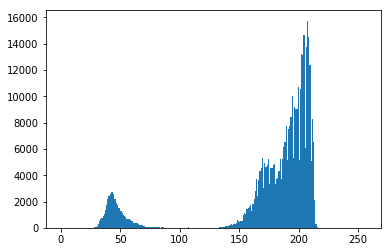

In [302]:
# imgpath = "D:\imageproc\lv2.jpg"
# imgpath = "D:\imageproc\Level 2\lv2-4.jpg"
imgpath = "D:\imageproc\Level 3\lv3-4.jpg"
# kernel = np.ones((5,5),np.uint8)
cimg = cv2.imread(imgpath,1)
cimg = cv2.resize(cimg,None,fx=0.5,fy=0.5)
img = cv2.imread(imgpath,0)
img = cv2.resize(img,None,fx=0.5,fy=0.5)
plt.hist(img.ravel(),256,[0,256])
plt.show()
showImage(cimg)

In [ ]:
# imgpath = "D:\imageproc\lv2.jpg"
imgpath = "D:\imageproc\Level 2\lv2-2.jpg"
# imgpath = "D:\imageproc\Level 4\lv4-2.jpg"
kernel = np.ones((5,5),np.uint8)
cimg = cv2.imread(imgpath,1)
cimg = cv2.resize(cimg,None,fx=0.5,fy=0.5)
img = cv2.imread(imgpath,0)
img = cv2.resize(img,None,fx=0.5,fy=0.5)
ret,pat = cv2.threshold(img,81,255,cv2.THRESH_BINARY)

mor = cv2.morphologyEx(pat, cv2.MORPH_OPEN, kernel)
# mor = cv2.dilate(pat,kernel,iterations = 1)
slashed = slashImg(cimg,mor)
showImage([slashed,pat,cimg,img])



In [ ]:
pat

In [ ]:
# imgpath = "D:\imageproc\lv3.jpg"
# img = cv2.imread(imgpath,0)
# img = cv2.resize(img,None,fx=0.3,fy=0.3)
# # showImage(img[0:50][:,110:120])
# min(img[0:50][:,110:120].ravel())


In [8]:
imgpath = "D:\imageproc\lv3.jpg"
img = cv2.imread(imgpath,0)
img = cv2.resize(img,None,fx=0.3,fy=0.3)
M,N = img.shape
result = np.zeros([M,N])
for i in range(M):
    for j in range(N):
        result[i,j] = img[i,j] + 100
        if(result[i,j]>255):
            result[i,j] = 255
        if(result[i,j]<0):
            result[i,j] = 0       
result = result.astype('uint8')
showImage(result)

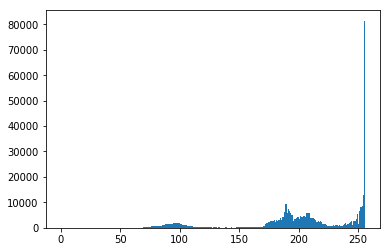

Counter({215: 2418,
         216: 2698,
         217: 2450,
         218: 2669,
         219: 2328,
         220: 1448,
         221: 1676,
         222: 1518,
         223: 1125,
         224: 879,
         225: 592,
         226: 797,
         227: 804,
         229: 936,
         228: 853,
         230: 806,
         231: 938,
         233: 862,
         234: 985,
         235: 684,
         236: 876,
         237: 1149,
         238: 1473,
         232: 1137,
         214: 3207,
         208: 5841,
         204: 4670,
         203: 4346,
         198: 3962,
         193: 5777,
         151: 150,
         127: 111,
         124: 190,
         110: 539,
         114: 358,
         109: 649,
         105: 940,
         101: 1429,
         102: 1248,
         100: 1582,
         96: 1841,
         91: 1300,
         95: 1789,
         97: 1859,
         104: 1002,
         98: 1950,
         94: 1691,
         93: 1453,
         118: 216,
         88: 1336,
         89: 1343,
         

In [85]:

plt.hist(img.ravel(),256,[0,256]); plt.show()
Counter(img.ravel())

In [ ]:

result

In [ ]:
np.zeros([5,5],dtype=np.int8)

array([[215, 216, 216, ..., 252, 252, 252],
       [215, 216, 216, ..., 252, 252, 252],
       [215, 216, 216, ..., 252, 252, 252],
       ...,
       [187, 186, 185, ..., 247, 246, 246],
       [186, 188, 188, ..., 247, 244, 245],
       [185, 187, 187, ..., 247, 244, 245]], dtype=uint8)

In [251]:
matriks = np.array([[9,0,2,3,7],[2,4,1,2,6],[7,3,8,7,9],[6,7,6,9,9],[0,0,9,7,9]])
cnt = Counter(matriks.ravel())
# cnt = list(cnt.items())
# cnt.sort()
# for i in range(len(cnt)):
#     cnt[i] = list(cnt[i])
    
# for i in range(len(cnt)):
#     cnt[i].append(cnt[i][1]/25)
cnt

Counter({9: 6, 0: 3, 2: 3, 3: 2, 7: 5, 4: 1, 1: 1, 6: 3, 8: 1})

In [250]:
cnt

[[0, 3, 0.12],
 [1, 1, 0.04],
 [2, 3, 0.12],
 [3, 2, 0.08],
 [4, 1, 0.04],
 [6, 3, 0.12],
 [7, 5, 0.2],
 [8, 1, 0.04],
 [9, 6, 0.24]]

In [181]:
tcnt = np.transpose(cnt)
ni = np.transpose(cnt)[1]
nmax = max(ni)
indexfind = np.where(mfind == nmax)
indexfind = indexfind[0][0]
cnt[indexfind]

[9, 6, 0.24]

In [214]:
df_cnt = pd.DataFrame(cnt,columns=['i', 'n', 'h(i)'])

In [237]:
df_cnt['h(i)'].values.tolist()

[0.12, 0.04, 0.12, 0.08, 0.04, 0.12, 0.2, 0.04, 0.24]

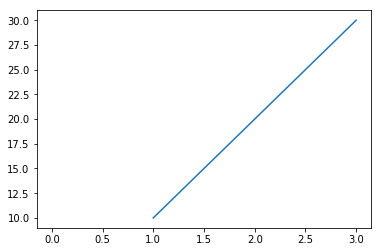

In [241]:
plt.plot([1,2,3],[10,20,30],30)

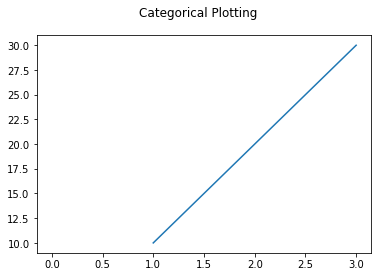

In [245]:
plt.plot([1,2,3],[10,20,30],30)
plt.suptitle('Categorical Plotting')
plt.show()

In [122]:
vmax = max(np.transpose(cnt)[1])

In [123]:
mfind = np.transpose(cnt)[1]

In [128]:
tcnt

array([[0.  , 1.  , 2.  , 3.  , 4.  , 6.  , 7.  , 8.  , 9.  ],
       [3.  , 1.  , 3.  , 2.  , 1.  , 3.  , 5.  , 1.  , 6.  ],
       [0.12, 0.04, 0.12, 0.08, 0.04, 0.12, 0.2 , 0.04, 0.24]])

In [129]:
imax = np.where(mfind == vmax)

In [156]:
imax[0][0]

8

In [281]:
for i in range(0,256):
    hist[i] = 0
matriks = np.array([[9,0,2,3,7],[2,4,1,2,6],[7,3,8,7,9],[6,7,6,9,9],[0,0,9,7,9]])
M,N = matriks.shape
for i in range(M):
    for j in range(N):
        hist[matriks[i][j]] = hist[matriks[i][j]] + 1

In [279]:
hist

array([[3.],
       [1.],
       [3.],
       [2.],
       [1.],
       [0.],
       [3.],
       [5.],
       [1.],
       [6.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [56]:
for i in range(len(cnt)):
    cnt[i] = list(cnt[i])

In [105]:
x = [1,2,3,4,5]
x.index(3)

2

In [60]:
cnt.sort()

In [61]:
cnt

[[0, 3], [1, 1], [2, 3], [3, 2], [4, 1], [6, 3], [7, 5], [8, 1], [9, 6]]